# Drawing the map of passes

We have 3 datasets of a match:

1. df_teams: with the team_id of the teams of the match.
2. df_player: id, name, team_id, position, minuts
3. df_pass: with player of the pass, position of the players, ...

## Loading datasets 

We start by loading the dataframes

In [3]:
import pandas as pd
import numpy as np

In [5]:
df_pass = pd.read_csv('datos_futbol/2372224_pass.txt',sep='\t')
df_player = pd.read_csv('datos_futbol/2372224_player.txt',sep='\t')
df_teams = pd.read_csv('datos_futbol/2372224_team.txt',sep='\t') 

Let's take a look at the three dataframes.

In [8]:
df_teams

,id,name
0,175,Atlético de Madrid
1,5683,Granada CF


First, we have two teams: 
- Atletico de Madrid (id 175)
- Granada (id 5683)

In [13]:
df_player

,id,first_name,last_name,known_name,team_id,shirt,posicion,titular,minutos
0,81352,Jan Oblak,Jan Oblak,Jan Oblak,175,13,Goalkeeper,Start,90
1,213431,Mario Hermoso,Mario Hermoso,Mario Hermoso,175,22,Defender,Start,90
2,41328,César Azpilicueta,César Azpilicueta,César Azpilicueta,175,3,Defender,Start,90
3,65807,Stefan Savic,Stefan Savic,Stefan Savic,175,15,Defender,Start,90
4,119718,Yannick Carrasco,Yannick Carrasco,Yannick Carrasco,175,21,Midfielder,Start,90
5,167449,Thomas Lemar,Thomas Lemar,Thomas Lemar,175,11,Midfielder,Start,59
6,192364,Marcos Llorente,Marcos Llorente,Marcos Llorente,175,14,Midfielder,Start,90
7,77390,Koke,Koke,Koke,175,6,Midfielder,Start,7
8,119141,Rodrigo De Paul,Rodrigo De Paul,Rodrigo De Paul,175,5,Midfielder,Start,77
9,76650,Antoine Griezmann,Antoine Griezmann,Antoine Griezmann,175,7,Striker,Start,77


In this data frame, we have:
- the players of both teams,
- their positions,
- and the minutes played
- ...

In [16]:
df_pass.head()

,match_id,id,team_id,period_id,min,sec,player_id_1,player_id_2,outcome,start_x,start_y,end_x,end_y,offside,possession,sequence,extra_1,extra_2,extra_3
0,2372224,2577383393,5683,1,0,0,174816,450429,1,49.9,50.2,31.2,49.8,0,1,1,0,0,0
1,2372224,2577383417,5683,1,0,2,450429,178876,1,30.4,47.4,28.9,23.2,0,1,1,0,0,0
2,2372224,2577383467,5683,1,0,5,178876,450429,1,28.9,23.4,24.4,45.8,0,1,1,0,0,0
3,2372224,2577383513,5683,1,0,8,450429,90801,1,23.7,51.4,25.5,86.1,0,1,1,0,0,0
4,2372224,2577383549,5683,1,0,11,90801,0,0,27.1,88.7,72.5,63.3,0,1,1,0,0,0


Here, the most important columns are:
- the identifiers of the players who made the pass,
- the pass's result (outcome)
- the pass's initial position
- the pass's final position.
- ...

## Building the passes' dataset

we make a function to build all the passes. 
we only want `outcome == 1` and `player_id_2 !=0`
 

In [20]:
def build_df_passesv2(passes, players):
    """ Obtain the name of the players from df_player and select outcome ==1 and drop 'player_id_2 == 0""" 
    df_pass = passes.copy()
    df_pass = df_pass.merge(df_player[['id','known_name']],how='left',left_on='player_id_1',right_on='id').drop('id_y',axis=1)
    df_pass.rename({'known_name':'player_name'},axis=1,inplace=True)
    df_pass = df_pass.merge(df_player[['id','known_name']],how='left',left_on='player_id_2',right_on='id').drop('id',axis=1)
    df_pass.rename({'known_name':'pass_recipient_name'},axis=1,inplace=True)
    df_pass = df_pass[(df_pass['outcome']==1) & (df_pass['player_id_2']!=0)]
    return df_pass

In [22]:
# Building the passes dataframe
df_passes = build_df_passesv2(df_pass,df_player)
df_passes.head()

,match_id,id_x,team_id,period_id,min,sec,player_id_1,player_id_2,outcome,start_x,...,end_x,end_y,offside,possession,sequence,extra_1,extra_2,extra_3,player_name,pass_recipient_name
0,2372224,2577383393,5683,1,0,0,174816,450429,1,49.9,...,31.2,49.8,0,1,1,0,0,0,Myrto Uzuni,Miguel Ángel Rubio
1,2372224,2577383417,5683,1,0,2,450429,178876,1,30.4,...,28.9,23.2,0,1,1,0,0,0,Miguel Ángel Rubio,Jesús Vallejo
2,2372224,2577383467,5683,1,0,5,178876,450429,1,28.9,...,24.4,45.8,0,1,1,0,0,0,Jesús Vallejo,Miguel Ángel Rubio
3,2372224,2577383513,5683,1,0,8,450429,90801,1,23.7,...,25.5,86.1,0,1,1,0,0,0,Miguel Ángel Rubio,Ignasi Miquel
8,2372224,2577383641,175,1,0,19,41328,77390,1,21.4,...,32.0,27.9,0,2,4,0,0,0,César Azpilicueta,Koke


## Selecting a team

We want to build the passing graph of one of the two teams, so the first thing is to select one of them. In this case, I don't know why, we choose **El Atletico de Madrid**

In [25]:
# Selecting Atletico de Madrid id 175
df_passes = df_passes[df_passes['team_id'] == 175]

In [27]:
df_passes.head()

,match_id,id_x,team_id,period_id,min,sec,player_id_1,player_id_2,outcome,start_x,...,end_x,end_y,offside,possession,sequence,extra_1,extra_2,extra_3,player_name,pass_recipient_name
8,2372224,2577383641,175,1,0,19,41328,77390,1,21.4,...,32.0,27.9,0,2,4,0,0,0,César Azpilicueta,Koke
9,2372224,2577383657,175,1,0,20,77390,76650,1,36.8,...,41.5,6.5,0,2,4,0,0,0,Koke,Antoine Griezmann
10,2372224,2577383695,175,1,0,22,76650,192364,1,43.1,...,29.0,7.4,0,2,4,0,0,0,Antoine Griezmann,Marcos Llorente
11,2372224,2577383707,175,1,0,24,192364,41328,1,29.0,...,15.3,17.1,0,2,4,0,0,0,Marcos Llorente,César Azpilicueta
12,2372224,2577383735,175,1,0,27,41328,65807,1,14.4,...,8.3,60.6,0,2,4,0,0,0,César Azpilicueta,Stefan Savic


## Selecting players 

When looking at the player data set we have seen that there were Atlético de Madrid players who had played very few minutes, so the next thing we are going to do is eliminate the passes of these players from the dataset. We choose a threshold of `30` minutes.

In [30]:
def select_players(df_player, team_id, minutes):
    #df_select = df_player[(df_player['team_id']==team_id) & (df_player['minutos']>30)]
    list_players_team = df_player[df_player['team_id']==175][['known_name','minutos']]
    list_players30 = list_players_team[list_players_team['minutos']<minutes]['known_name'].to_list()
    players_to_remove = set(list_players30)
    return players_to_remove
    

In [32]:
players_to_remove = select_players(df_player, 175,30)
players_to_remove

{'Antonio Gomis',
 'Ilias Kostis',
 'Ivo Grbic',
 'Javi Galán',
 'João Félix',
 'Koke',
 'Rodrigo Riquelme',
 'Samuel Lino',
 'Saúl Ñíguez',
 'Ángel Correa'}

In [34]:
# Filtrar el DataFrame
df_filtered = df_passes[~df_passes['player_name'].isin(players_to_remove) & ~df_passes['pass_recipient_name'].isin(players_to_remove)]

df_passes = df_filtered

In [36]:
df_passes.head()

,match_id,id_x,team_id,period_id,min,sec,player_id_1,player_id_2,outcome,start_x,...,end_x,end_y,offside,possession,sequence,extra_1,extra_2,extra_3,player_name,pass_recipient_name
10,2372224,2577383695,175,1,0,22,76650,192364,1,43.1,...,29.0,7.4,0,2,4,0,0,0,Antoine Griezmann,Marcos Llorente
11,2372224,2577383707,175,1,0,24,192364,41328,1,29.0,...,15.3,17.1,0,2,4,0,0,0,Marcos Llorente,César Azpilicueta
12,2372224,2577383735,175,1,0,27,41328,65807,1,14.4,...,8.3,60.6,0,2,4,0,0,0,César Azpilicueta,Stefan Savic
13,2372224,2577383771,175,1,0,29,65807,213431,1,8.1,...,20.2,80.0,0,2,4,0,0,0,Stefan Savic,Mario Hermoso
14,2372224,2577383807,175,1,0,32,213431,65807,1,21.2,...,15.4,67.8,0,2,4,0,0,0,Mario Hermoso,Stefan Savic


Now, we need to calculate some measurements to draw our passes graph:
- Configuration dictionary of the draw
- Rescaling the values of the plot
- Average position of each player **player_position**
- Number of passes by player 

In [39]:
config = {
  "background_color": "white",
  "lines_color": "#bcbcbc",
  "edges_cmap": "Oranges",
  "nodes_cmap": "Reds",
  "font_color": "black",

  "plot_edges": "TRUE",
  "fig_size": 12,
  "font_size": 9,
  "width": 105,
  "height": 68,

  "max_node_size": 100,
  "min_node_size": 25,
  "max_edge_width": 5,
  "min_edge_width": 1
}

height = float(config["height"])
width = float(config["width"])

In [41]:
# Rescaling the values of positions
df_passes["origin_pos_x"] = df_passes["start_x"]*width/100
df_passes["origin_pos_y"] = df_passes["start_y"]*height/100

In [43]:
player_position = df_passes.groupby("player_name").agg({"origin_pos_x": "mean", "origin_pos_y": "mean"})

In [45]:
player_position

,origin_pos_x,origin_pos_y
player_name,,
Antoine Griezmann,67.053000,22.712000
César Azpilicueta,56.083125,12.042800
Jan Oblak,10.250625,36.647750
Marcos Llorente,65.588654,6.548923
Mario Hermoso,46.417000,57.626222
Memphis Depay,93.528750,48.671000
Pablo Barrios,44.839565,34.765739
Rodrigo De Paul,58.259250,23.179500
Stefan Savic,34.656364,32.808970


In [47]:
player_pass_count = df_passes.groupby("player_name").size().to_frame("num_passes")
player_pass_count

,num_passes
player_name,
Antoine Griezmann,30
César Azpilicueta,40
Jan Oblak,16
Marcos Llorente,26
Mario Hermoso,45
Memphis Depay,4
Pablo Barrios,23
Rodrigo De Paul,40
Stefan Savic,33


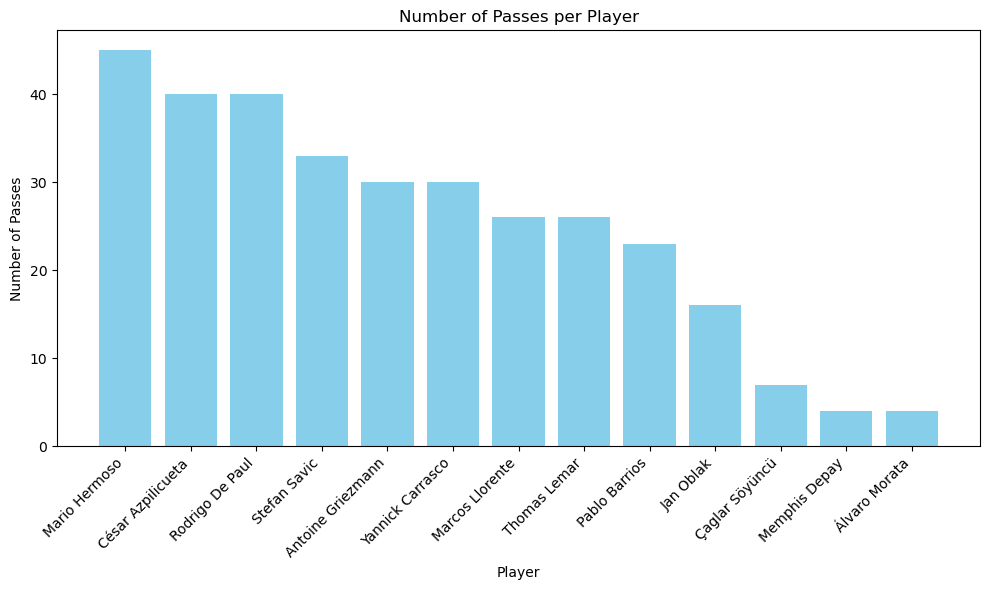

In [49]:
import matplotlib.pyplot as plt


# Ordenar los datos por número de pases (opcional)
player_pass_count = player_pass_count.sort_values(by='num_passes', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(player_pass_count.index, player_pass_count['num_passes'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Player')
plt.ylabel('Number of Passes')
plt.title('Number of Passes per Player')

# Rotar las etiquetas de los jugadores para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [51]:
df_passes["pair_key"] = df_passes.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
pair_pass_count = df_passes.groupby("pair_key").size().to_frame("num_passes")
pair_pass_value = df_passes.groupby("pair_key").size().to_frame("pass_value")
player_pass_value = df_passes.groupby("player_name").size().to_frame("pass_value") # pass value es el número de pases


In [53]:
player_pass_value

,pass_value
player_name,
Antoine Griezmann,30
César Azpilicueta,40
Jan Oblak,16
Marcos Llorente,26
Mario Hermoso,45
Memphis Depay,4
Pablo Barrios,23
Rodrigo De Paul,40
Stefan Savic,33


In [55]:
pair_pass_value

,pass_value
pair_key,
Antoine Griezmann_César Azpilicueta,9
Antoine Griezmann_Marcos Llorente,11
Antoine Griezmann_Mario Hermoso,4
Antoine Griezmann_Pablo Barrios,7
Antoine Griezmann_Rodrigo De Paul,19
Antoine Griezmann_Stefan Savic,3
Antoine Griezmann_Thomas Lemar,2
Antoine Griezmann_Yannick Carrasco,6
Antoine Griezmann_Álvaro Morata,1


In [57]:
def _point_to_meters(p):
    '''
    Convert a point's coordinates from a 0-1 range to meters.
    '''
    return np.array([p[0]*width, p[1]*height])


def _meters_to_point(p):
    '''
    Convert a point's coordinates from meters to a 0-1 range.
    '''
    return np.array([p[0]/width, p[1]/height])


def _change_range(value, old_range, new_range):
    '''
    Convert a value from one range to another one, maintaining ratio.
    '''
    return ((value-old_range[0]) / (old_range[1]-old_range[0])) * (new_range[1]-new_range[0]) + new_range[0]



def draw_pitch(min_x=0, max_x=1):
    """
    Plot an empty horizontal football pitch, returning Matplotlib's ax object so we can keep adding elements to it.
    Parameters
    -----------
        min_x: float value from 0 to 'max_x' to choose a subsection of the pitch. Default value is 0.
        max_x: float value from 'min_x' to 1 to choose a subsection of the pitch. Default value is 1.
    Returns
    -----------
       ax : Matplotlib's axis object to keetp adding elements on the pitch.
    """
    background_color = config["background_color"]
    lines_color = config["lines_color"]
    fig_size = config["fig_size"]

    # This allows to plot a subsection of the pitch
    ratio = height / float((width * max_x)-(width * min_x))
    f, ax = plt.subplots(1, 1, figsize=(fig_size, fig_size*ratio), dpi=100)

    ax.set_ylim([0, height])
    ax.set_xlim([width*min_x, width*max_x])
    ax.add_patch(patches.Rectangle((0, 0), width, height, color=background_color))

    # Plot outer lines
    line_pts = [
        [_point_to_meters([0, 0]), _point_to_meters([0, 1])],  # left line
        [_point_to_meters([1, 0]), _point_to_meters([1, 1])],  # right line
        [_point_to_meters([0, 1]), _point_to_meters([1, 1])],  # top line
        [_point_to_meters([0, 0]), _point_to_meters([1, 0])],  # bottom line
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
                alpha=0.8, lw=1.5, zorder=3, color=lines_color)

    # Plot boxes
    line_pts = [
        [_point_to_meters([0.5, 0]), _point_to_meters([0.5, 1])],  # center line

        # left box
        [[0, 24.85], [0, 2.85]],
        [[0, 13.85], [16.5, 13.85]],
        [[0, 54.15], [16.5, 54.15]],
        [[16.5, 13.85], [16.5, 54.15]],

        # left goal
        [[0, 24.85], [5.5, 24.85]],
        [[0, 43.15], [5.5, 43.15]],
        [[5.5, 24.85], [5.5, 43.15]],

        # right box
        [[105, 24.85], [105, 2.85]],
        [[105, 13.85], [88.5, 13.85]],
        [[105, 54.15], [88.5, 54.15]],
        [[88.5, 13.85], [88.5, 54.15]],

        # right goal
        [[105, 24.85], [99.5, 24.85]],
        [[105, 43.15], [99.5, 43.15]],
        [[99.5, 24.85], [99.5, 43.14]]
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
                alpha=0.8, lw=1.5, zorder=3, color=lines_color)

    # Plot circles
    ax.add_patch(patches.Wedge((94.0, 34.0), 9, 130, 230, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    ax.add_patch(patches.Wedge((11.0, 34.0), 9, 310, 50, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    ax.add_patch(patches.Wedge((52.5, 34), 9.5, 0, 360, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    plt.axis('off')
    return ax

In [59]:
def draw_pass_map(ax, player_position,
                  player_pass_count, player_pass_value, pair_pass_count, pair_pass_value, title="", legend="",
                  max_player_count=None, max_player_value=None, max_pair_count=None, max_pair_value=None):
    """
    Plot a passing network.
    Parameters
    -----------
        ax: Matplotlib's axis object, it expects to have the pitch already plotted.
        player_position: pandas DataFrame with player names as index and columns 'origin_pos_x' and 'origin_pos_y' in 0-1 range.
        player_pass_count: pandas DataFrame with player names as index and a column 'num_passes'.
        player_pass_value: pandas DataFrame with player names as index and a column 'pass_value'.
        pair_pass_count: pandas DataFrame with 'player1_player2' as index and a column 'num_passes'.
        pair_pass_value: pandas DataFrame with 'player1_player2' as index and a column 'pass_value'.
        title: text that will be shown above the pitch.
        legend: text that will be shown in the bottom-left corner of the pitch.
        max_player_count: max number of passes per player. If not specified, it uses the player_pass_count.num_passes.max()
        max_player_value: max pass value per player. If not specified, it uses the player_pass_value.pass_value.max()
        max_pair_count: max number of passes per player pair. If not specified, it uses the pair_pass_count.num_passes.max()
        max_pair_value: max pass value per player pair. If not specified, it uses the pair_pass_value.pass_value.max()
    Returns
    -----------
       ax : Matplotlib's axis object to keep adding elements on the pitch.
    """
    background_color = config["background_color"]

    player_position["origin_pos_y"] = player_position["origin_pos_y"]
    player_position["origin_pos_x"] = player_position["origin_pos_x"]

    # This allows to fix the range of sizes and color scales so that two plots from different teams are comparable.
    max_player_count = player_pass_count.num_passes.max() if max_player_count is None else max_player_count
    max_player_value = player_pass_value.pass_value.max() if max_player_value is None else max_player_value
    max_pair_count = pair_pass_count.num_passes.max() if max_pair_count is None else max_pair_count
    max_pair_value = pair_pass_value.pass_value.max() if max_pair_value is None else max_pair_value

    # Step 1: plot edges
    if config["plot_edges"]:
        # Combine num_passes and pass_value columns into one DataFrame
        pair_stats = pd.merge(pair_pass_count, pair_pass_value, left_index=True, right_index=True)
        for pair_key, row in pair_stats.iterrows():
            player1, player2 = pair_key.split("_")

            player1_x = player_position.loc[player1]["origin_pos_x"]
            player1_y = player_position.loc[player1]["origin_pos_y"]

            player2_x = player_position.loc[player2]["origin_pos_x"]
            player2_y = player_position.loc[player2]["origin_pos_y"]

            num_passes = row["num_passes"]
            pass_value = row["pass_value"]

            line_width = _change_range(num_passes, (0, max_pair_count), (config["min_edge_width"], config["max_edge_width"]))
            norm = Normalize(vmin=0, vmax=max_pair_value)
            edge_cmap = cm.get_cmap(config["nodes_cmap"])
            edge_color = edge_cmap(norm(pass_value))

            ax.plot([player1_x, player2_x], [player1_y, player2_y],
                    'w-', linestyle='-', alpha=1, lw=line_width, zorder=3, color=edge_color)

    # Step 2: plot nodes
    # Combine num_passes and pass_value columns into one DataFrame
    player_stats = pd.merge(player_pass_count, player_pass_value, left_index=True, right_index=True)
    for player_name, row in player_stats.iterrows():
        player_x = player_position.loc[player_name]["origin_pos_x"]
        player_y = player_position.loc[player_name]["origin_pos_y"]

        num_passes = row["num_passes"]
        pass_value = row["pass_value"]

        marker_size = _change_range(num_passes, (0, max_player_count), (config["min_node_size"], config["max_node_size"]))
        norm = Normalize(vmin=0, vmax=max_player_value)
        node_cmap = cm.get_cmap(config["nodes_cmap"])
        node_color = node_cmap(norm(pass_value))

        ax.plot(player_x, player_y, '.', color=node_color, markersize=marker_size, zorder=5)
        ax.plot(player_x, player_y, '.', color=background_color, markersize=marker_size-20, zorder=6)
        ax.annotate(player_name, xy=(player_x, player_y), ha="center", va="center", zorder=7,
                    fontsize=config["font_size"], color=config["font_color"], weight='bold',
                    path_effects=[pe.withStroke(linewidth=2, foreground=background_color)])

    # Step 3: Extra information shown on the plot
    #ax.annotate("Per si volem escriure algo", xy=(0.99*width, 0.02*height),
                #ha="right", va="bottom", zorder=7, fontsize=10, color=config["lines_color"])

    if legend:
        ax.annotate(legend, xy=(0.01*width, 0.02*height),
                    ha="left", va="bottom", zorder=7, fontsize=10, color=config["lines_color"])

    if title:
        ax.set_title(title, loc="center")

    return ax

In [61]:
from matplotlib.colors import Normalize
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from matplotlib import cm
import matplotlib.pyplot as plt

/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/4190677113.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_cmap = cm.get_cmap(config["nodes_cmap"])
/var/folders/4v

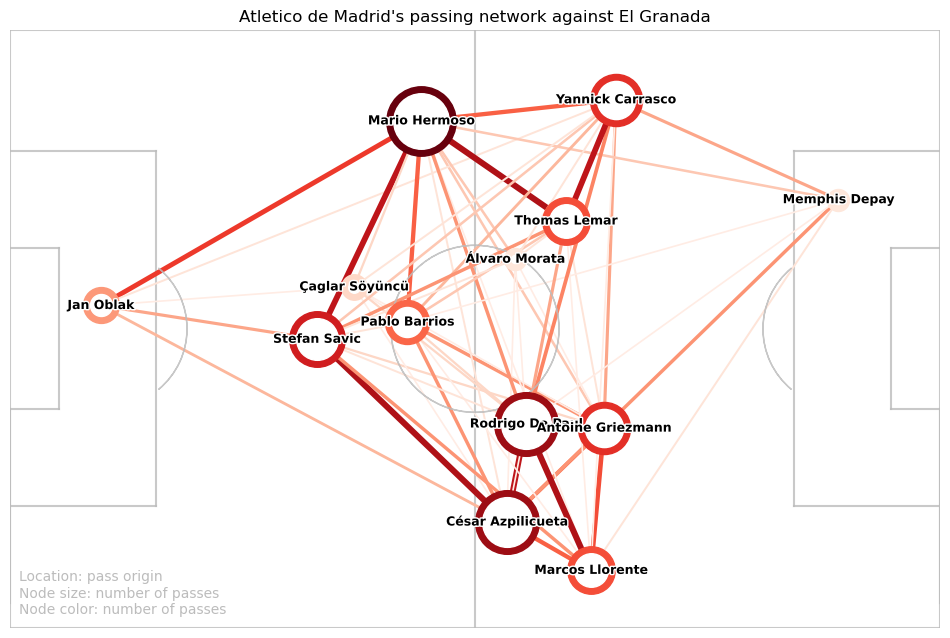

In [63]:
plot_title ="Atletico de Madrid's passing network against El Granada"

plot_legend = "Location: pass origin\nNode size: number of passes\nNode color: number of passes"

ax = draw_pitch()
ax = draw_pass_map(ax, player_position, player_pass_count, player_pass_value,
              pair_pass_count, pair_pass_value, plot_title, plot_legend)


In [91]:
def get_passes_matrix(df_passes, players):

    # Get in Matrix format
    player_pass_count = df_passes.groupby(["player_name","pass_recipient_name"]).size().to_frame("num_passes").reset_index()
    player_pass_count = player_pass_count.pivot_table(values='num_passes', index="player_name", columns='pass_recipient_name')

    # Get passing matrix for all players in team (all no matter if did not play or did not pass)
    passing_matrix = pd.DataFrame(player_pass_count,columns=players,index=players).fillna(0).astype(int)
    return passing_matrix

def get_players(df_player,team_id):
    # Get list of players sorted by name
    players = df_player[df_player['team_id'] == team_id]['known_name'].unique()
    players.sort()
    return players

In [189]:
players = get_players(df_player[df_player['minutos']>0],175)
players

array(['Antoine Griezmann', 'César Azpilicueta', 'Jan Oblak', 'Koke',
       'Marcos Llorente', 'Mario Hermoso', 'Memphis Depay',
       'Pablo Barrios', 'Rodrigo De Paul', 'Saúl Ñíguez', 'Stefan Savic',
       'Thomas Lemar', 'Yannick Carrasco', 'Álvaro Morata',
       'Ángel Correa', 'Çaglar Söyüncü'], dtype=object)

In [191]:
df_passes

,match_id,id_x,team_id,period_id,min,sec,player_id_1,player_id_2,outcome,start_x,...,possession,sequence,extra_1,extra_2,extra_3,player_name,pass_recipient_name,origin_pos_x,origin_pos_y,pair_key
10,2372224,2577383695,175,1,0,22,76650,192364,1,43.1,...,2,4,0,0,0,Antoine Griezmann,Marcos Llorente,45.255,2.720,Antoine Griezmann_Marcos Llorente
11,2372224,2577383707,175,1,0,24,192364,41328,1,29.0,...,2,4,0,0,0,Marcos Llorente,César Azpilicueta,30.450,5.032,César Azpilicueta_Marcos Llorente
12,2372224,2577383735,175,1,0,27,41328,65807,1,14.4,...,2,4,0,0,0,César Azpilicueta,Stefan Savic,15.120,15.572,César Azpilicueta_Stefan Savic
13,2372224,2577383771,175,1,0,29,65807,213431,1,8.1,...,2,4,0,0,0,Stefan Savic,Mario Hermoso,8.505,44.064,Mario Hermoso_Stefan Savic
14,2372224,2577383807,175,1,0,32,213431,65807,1,21.2,...,2,4,0,0,0,Mario Hermoso,Stefan Savic,22.260,56.984,Mario Hermoso_Stefan Savic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2372224,2577431467,175,2,92,28,213431,503523,1,54.4,...,181,274,0,0,0,Mario Hermoso,Pablo Barrios,57.120,52.564,Mario Hermoso_Pablo Barrios
1014,2372224,2577432253,175,2,94,50,65807,119718,1,19.9,...,0,0,0,3,0,Stefan Savic,Yannick Carrasco,20.895,26.792,Stefan Savic_Yannick Carrasco
1019,2372224,2577432469,175,2,95,34,192364,106824,1,90.6,...,185,282,0,0,0,Marcos Llorente,Memphis Depay,95.130,0.000,Marcos Llorente_Memphis Depay
1023,2372224,2577432833,175,2,96,54,119718,503523,1,99.5,...,187,286,0,0,6,Yannick Carrasco,Pablo Barrios,104.475,67.660,Pablo Barrios_Yannick Carrasco


In [193]:
matrix_all = get_passes_matrix(df_passes, players)                      # Get passing matrix (All passes)

In [195]:
matrix_all

,Antoine Griezmann,César Azpilicueta,Jan Oblak,Koke,Marcos Llorente,Mario Hermoso,Memphis Depay,Pablo Barrios,Rodrigo De Paul,Saúl Ñíguez,Stefan Savic,Thomas Lemar,Yannick Carrasco,Álvaro Morata,Ángel Correa,Çaglar Söyüncü
Antoine Griezmann,0,3,0,0,5,1,0,5,10,0,1,0,3,1,0,1
César Azpilicueta,6,0,2,0,7,0,5,4,5,0,10,0,0,1,0,0
Jan Oblak,0,3,0,0,0,10,0,0,0,0,3,0,0,0,0,0
Koke,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Marcos Llorente,6,3,0,0,0,0,2,0,11,0,4,0,0,0,0,0
Mario Hermoso,3,2,2,0,1,0,3,3,3,0,7,8,6,4,0,3
Memphis Depay,0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
Pablo Barrios,2,3,0,0,1,7,1,0,3,0,2,3,1,0,0,0
Rodrigo De Paul,9,10,0,0,5,4,1,0,0,0,1,4,5,0,0,1
Saúl Ñíguez,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
import networkx as nx
graph_passes_all = nx.from_pandas_adjacency(matrix_all, create_using = nx.DiGraph)

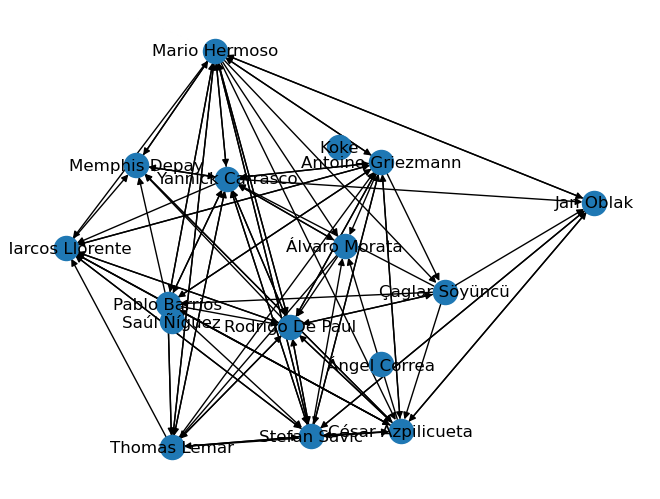

In [199]:
nx.draw(graph_passes_all, with_labels=True, pos=nx.kamada_kawai_layout(graph_passes_all))

In [201]:
eigen_cent_all = list(nx.eigenvector_centrality(graph_passes_all,weight='weight').values())
passes_done_all = matrix_all.sum(axis = 1)

In [203]:
eigen_cent_all

[0.36704118741982067,
 0.34096828094420767,
 0.10107939608693332,
 3.911542884732665e-19,
 0.27897027315873274,
 0.3560668006059016,
 0.18385924449699584,
 0.19628548751661382,
 0.40629386688673824,
 3.911542884732665e-19,
 0.3141470240639768,
 0.29136174281319027,
 0.31445726256112594,
 0.10268591815435371,
 3.911542884732665e-19,
 0.061495265506122554]

In [205]:
passes_done_all

Antoine Griezmann    30
César Azpilicueta    40
Jan Oblak            16
Koke                  0
Marcos Llorente      26
Mario Hermoso        45
Memphis Depay         4
Pablo Barrios        23
Rodrigo De Paul      40
Saúl Ñíguez           0
Stefan Savic         33
Thomas Lemar         26
Yannick Carrasco     30
Álvaro Morata         4
Ángel Correa          0
Çaglar Söyüncü        7
dtype: int64

In [207]:
player_position.index

Index(['Antoine Griezmann', 'César Azpilicueta', 'Jan Oblak',
       'Marcos Llorente', 'Mario Hermoso', 'Memphis Depay', 'Pablo Barrios',
       'Rodrigo De Paul', 'Stefan Savic', 'Thomas Lemar', 'Yannick Carrasco',
       'Álvaro Morata', 'Çaglar Söyüncü'],
      dtype='object', name='player_name')

In [209]:
stats_match = pd.DataFrame(list(zip(players,passes_done_all,eigen_cent_all)), 
                                   columns = ['Player','Passes done All','eigen_cent_all'])
df_players_player = df_player[['known_name','posicion','titular','minutos']]

In [211]:
# Get the stats for that team in the match
#avg_position = df_passes[['start_x','start_y','player_name_1']].groupby('player_name_1').mean().reset_index()

df_players_player.columns=['known_name','Position','Starting','Minutes played']
stats_match = stats_match.merge(player_position,how='left',left_on='Player',right_on=player_position.index)
#df_players_player['team'] = df_xG[df_xG['team_receives_id']==team]['team_receives_name'].iloc[0]        # Get team name
stats_match = stats_match.merge(df_players_player,how='inner',left_on='Player',right_on='known_name').drop('known_name',axis=1)


In [219]:
stats_match

,Player,Passes done All,eigen_cent_all,origin_pos_x,origin_pos_y,Position,Starting,Minutes played
0,Antoine Griezmann,30,3.670412e-01,67.053000,22.712000,Striker,Start,77
1,César Azpilicueta,40,3.409683e-01,56.083125,12.042800,Defender,Start,90
2,Jan Oblak,16,1.010794e-01,10.250625,36.647750,Goalkeeper,Start,90
3,Koke,0,3.911543e-19,NaN,NaN,Midfielder,Start,7
4,Marcos Llorente,26,2.789703e-01,65.588654,6.548923,Midfielder,Start,90
5,Mario Hermoso,45,3.560668e-01,46.417000,57.626222,Defender,Start,90
6,Memphis Depay,4,1.838592e-01,93.528750,48.671000,Substitute,Sub,32
7,Pablo Barrios,23,1.962855e-01,44.839565,34.765739,Substitute,Sub,83
8,Rodrigo De Paul,40,4.062939e-01,58.259250,23.179500,Midfielder,Start,77
9,Saúl Ñíguez,0,3.911543e-19,NaN,NaN,Substitute,Sub,13


In [229]:
stats_match.sort_values(by = 'Passes done All', ascending = False, inplace = True)

In [235]:
stats_match.eigen_cent_all[:-3]

5     0.356067
1     0.340968
8     0.406294
10    0.314147
0     0.367041
12    0.314457
4     0.278970
11    0.291362
7     0.196285
2     0.101079
15    0.061495
6     0.183859
13    0.102686
Name: eigen_cent_all, dtype: float64

In [241]:
player_pass_count['num_passes'] = list(stats_match.eigen_cent_all[:-3])

In [243]:
player_pass_count

,num_passes
player_name,
Mario Hermoso,0.356067
César Azpilicueta,0.340968
Rodrigo De Paul,0.406294
Stefan Savic,0.314147
Antoine Griezmann,0.367041
Yannick Carrasco,0.314457
Marcos Llorente,0.278970
Thomas Lemar,0.291362
Pablo Barrios,0.196285


/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/4190677113.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_cmap = cm.get_cmap(config["nodes_cmap"])
/var/folders/4v

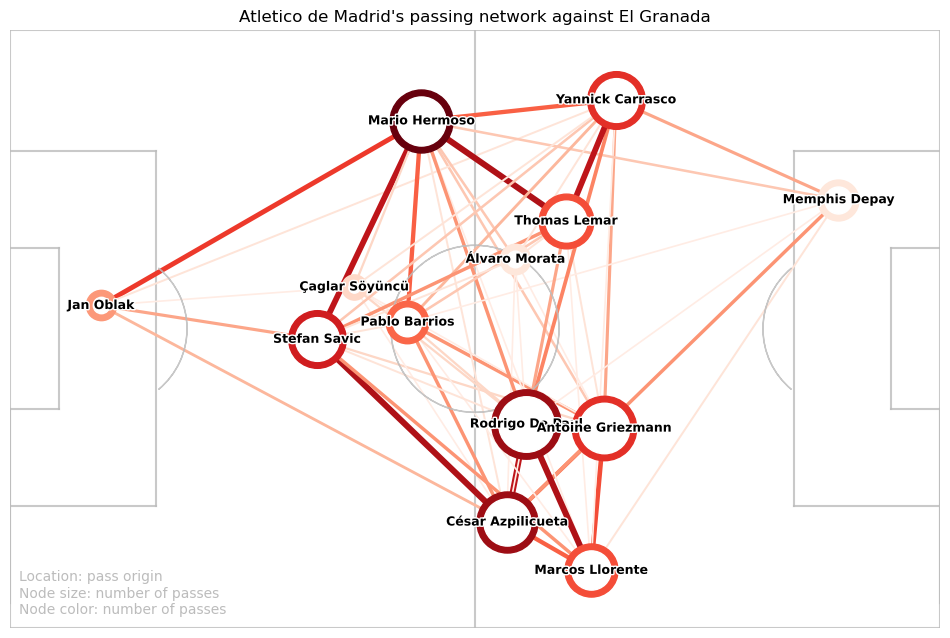

In [245]:
plot_title ="Atletico de Madrid's passing network against El Granada"

plot_legend = "Location: pass origin\nNode size: number of passes\nNode color: number of passes"

ax = draw_pitch()
ax = draw_pass_map(ax, player_position, player_pass_count, player_pass_value,
              pair_pass_count, pair_pass_value, plot_title, plot_legend)


In [249]:
player_position

,origin_pos_x,origin_pos_y
player_name,,
Antoine Griezmann,67.053000,22.712000
César Azpilicueta,56.083125,12.042800
Jan Oblak,10.250625,36.647750
Marcos Llorente,65.588654,6.548923
Mario Hermoso,46.417000,57.626222
Memphis Depay,93.528750,48.671000
Pablo Barrios,44.839565,34.765739
Rodrigo De Paul,58.259250,23.179500
Stefan Savic,34.656364,32.808970


/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',


NameError: name 'num_passes' is not defined

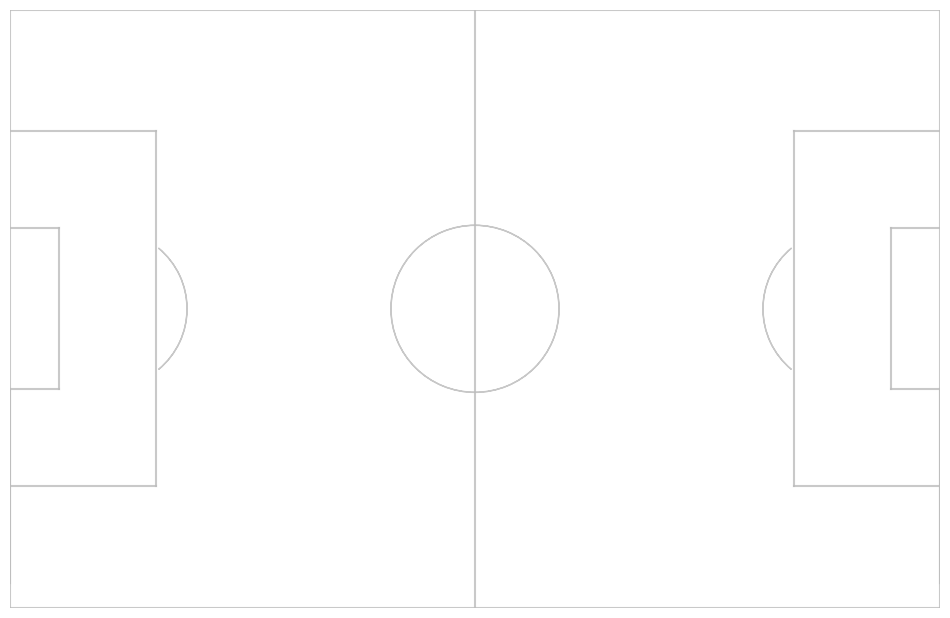

In [287]:
draw_pitch()
for player1,_ in stats_match.iterrows():
    
    player1_x = player_position.loc[player1]["origin_pos_x"]
    player1_y = player_position.loc[player1]["origin_pos_y"]
    num_passes = row["num_passes"]
    marker_size = _change_range(num_passes, (0, max_player_count), (config["min_node_size"], config["max_node_size"]))
    norm = Normalize(vmin=0, vmax=max_player_value)
    node_cmap = cm.get_cmap(config["nodes_cmap"])
    node_color = node_cmap(norm(pass_value))

    ax.plot(player_x, player_y, '.', color=node_color, markersize=marker_size, zorder=5)
    ax.plot(player_x, player_y, '.', color=background_color, markersize=marker_size-20, zorder=6)
    

In [289]:
player_pass_count

,num_passes
player_name,
Mario Hermoso,0.356067
César Azpilicueta,0.340968
Rodrigo De Paul,0.406294
Stefan Savic,0.314147
Antoine Griezmann,0.367041
Yannick Carrasco,0.314457
Marcos Llorente,0.278970
Thomas Lemar,0.291362
Pablo Barrios,0.196285


/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
/var/folders/4v/bc38mk4n2sd9tmvl7vnz9xcr0000gn/T/ipykernel_2346/2347432728.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',


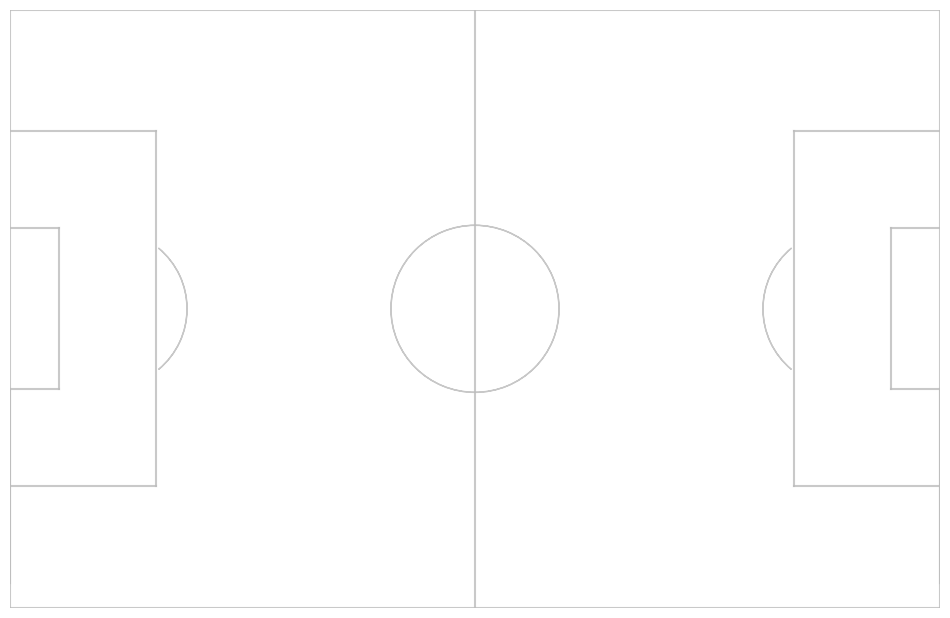

In [353]:
draw_pitch()
player_x = row.origin_pos_x
player_y =row.origin_pos_y
ax.plot(player_x, player_y, 'o')


In [355]:
pos=nx.kamada_kawai_layout(graph_passes_all)
pos

{'Antoine Griezmann': array([0.30013107, 0.34220712]),
 'César Azpilicueta': array([ 0.36376152, -0.50896722]),
 'Jan Oblak': array([1.        , 0.21343608]),
 'Koke': array([0.16103204, 0.38877702]),
 'Marcos Llorente': array([-0.73810684,  0.07003664]),
 'Mario Hermoso': array([-0.24663571,  0.69527443]),
 'Memphis Depay': array([-0.50580352,  0.33260996]),
 'Pablo Barrios': array([-0.40241261, -0.10761967]),
 'Rodrigo De Paul': array([ 0.00018462, -0.17881655]),
 'Saúl Ñíguez': array([-0.38875906, -0.16103653]),
 'Stefan Savic': array([ 0.06806483, -0.52513522]),
 'Thomas Lemar': array([-0.38939788, -0.56100981]),
 'Yannick Carrasco': array([-0.20648501,  0.28996155]),
 'Álvaro Morata': array([0.17917148, 0.07596937]),
 'Ángel Correa': array([ 0.29755316, -0.29753788]),
 'Çaglar Söyüncü': array([ 0.50770191, -0.06814928])}

In [ ]:
nx.draw(graph_passes_all, with_labels=True, pos=nx.kamada_kawai_layout(graph_passes_all))